# Question 1

## Data exploration

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, recall_score, precision_score, f1_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, SpectralClustering, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score, adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

# Loading the simple image data from 'smiley_X.npy' and class labels from 'smiley_Y.npy'
X = np.load('smiley_X.npy')
Y = np.load('smiley_Y.npy')

# Loading the noisy image data from 'smiley_noisy_X.npy' and class labels from 'smiley_noisy_Y.npy'
NX = np.load('smiley_noisy_X.npy')
NY = np.load('smiley_noisy_Y.npy')
print("Simple smiley dataset shape:", X.shape)
print("Noisy smiley dataset shape:", NX.shape)

Simple smiley dataset shape: (204, 9, 9, 1)
Noisy smiley dataset shape: (204, 9, 9, 1)


In [2]:
current_directory = os.getcwd()
print(current_directory)

C:\Users\hayee\F21DL


In [3]:
# Exploring the dataset
num_samples = X.shape[0]
num_classes = len(np.unique(Y))
image_shape = X.shape[1:]  # Assuming images are grayscale (9x9x1)

# Printing the dataset information
print(f"Number of samples: {num_samples}")
print(f"Number of classes: {num_classes}")
print(f"Image shape: {image_shape}")

Number of samples: 204
Number of classes: 3
Image shape: (9, 9, 1)


#### Ploting a sample of simple images

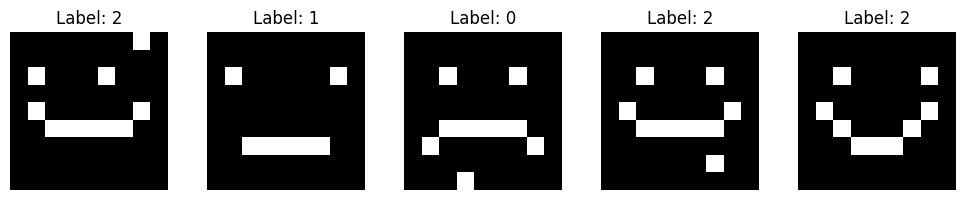

In [4]:
#Ploting a sample of images with their corresponding labels
num_images_to_plot = 5

Y = Y.astype(int)
NY  = NY.astype(int)

# Randomly select samples
random_indices = np.random.choice(num_samples, size=num_images_to_plot, replace=False)

# Plot the Noisy images with their labels
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(10, 2))
for i, index in enumerate(random_indices):
    image = X[index].squeeze()
    label = Y[index]

    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### Ploting a sample of noisy images

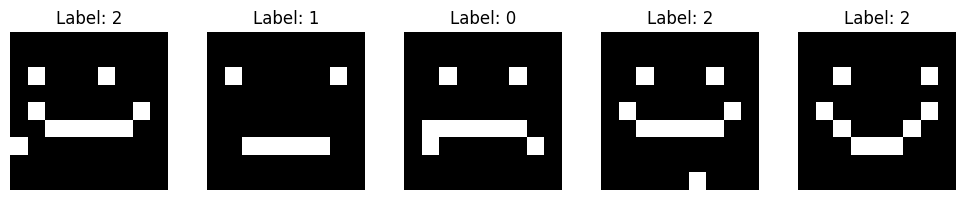

In [5]:
# Ploting the noisy images with their labels
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(10, 2))
for i, index in enumerate(random_indices):
    image = NX[index].squeeze()
    label = NY[index]
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Label: {label}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

#### Checking for missing values

In [6]:
has_missing_valuesSX = np.isnan(X).any()
has_missing_valuesSY = np.isnan(Y).any()
has_missing_valuesNX = np.isnan(NX).any()
has_missing_valuesNY = np.isnan(NY).any()
if has_missing_valuesSX:
    print("The Simple X array contains missing values.")
else:
    print("The Simple X array does not contain missing values.")
    
if has_missing_valuesSY:
    print("The Simple Y array contains missing values.")
else:
    print("The Simple Y array does not contain missing values.")
    
if has_missing_valuesNX:
    print("The Noisy X array contains missing values.")
else:
    print("The Noisy X array does not contain missing values.")
    
if has_missing_valuesNY:
    print("The Noisy Y array contains missing values.")
else:
    print("The Noisy Y array does not contain missing values.")

The Simple X array does not contain missing values.
The Simple Y array does not contain missing values.
The Noisy X array does not contain missing values.
The Noisy Y array does not contain missing values.


#### Data distribution analysis

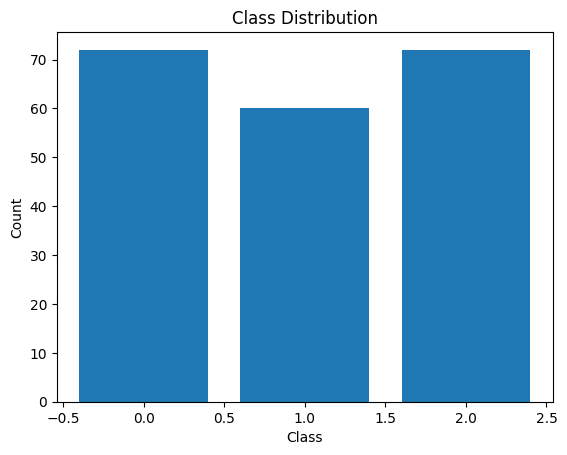

In [7]:
# Calculate the class distribution.
# It actually checks how the samples distributed to each class 
# Because imbalance in data distribution for each class can cause problems in model creation.

class_counts = np.bincount(Y)
class_labels = np.unique(Y)

# Plot the class distribution
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

#### Mean pixel analysis

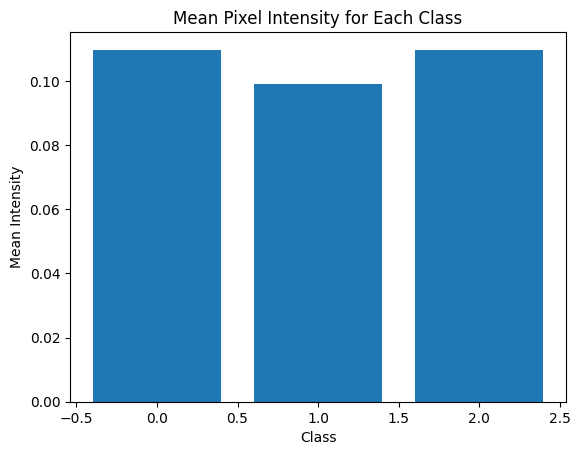

In [8]:
# Extract mean pixel intensity for each class
# This analysis shows that for each label(class) how much the pixle intensity is different.
# Means it checks whether for a specific class images are more btighter or not.
# It just take the mean of pixle values of each image then draw on graph with respect to their class.

mean_intensities = []
for label in class_labels:
    class_indices = np.where(Y == label)[0]
    class_images = X[class_indices]
    class_mean_intensity = np.mean(class_images)
    mean_intensities.append(class_mean_intensity)

# Ploting the mean intensities for each class
plt.bar(class_labels, mean_intensities)
plt.xlabel('Class')
plt.ylabel('Mean Intensity')
plt.title('Mean Pixel Intensity for Each Class')
plt.show()

# Preprocessing (if applicable)
# Example: Normalize pixel intensities to [0, 1]
X_normalized = X.astype(float) / 255.0

#### Until now the data analysis shows:
1. There are total 204 samples with 3 different classes. Images have 9x9x1 shape.
2. Noisy data have more random pixles in the images that makes it noisy.
3. There are no missing values in data. So no need to fix this issue.
4. Data distribution analysis shows that images distribution for each class is fine.
5. Mean pixle intensity shows that images are almost equally bright with respect to each class. 

## Naive-Byes classifier

### Simple dataset

In [9]:
# Flattening the images into 1-dimensional arrays
X_flat = X.reshape(X.shape[0], -1)

# Spliting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.12, random_state=42)

# Initializing the Naive Bayes classifier
classifier = GaussianNB()

# Training the classifier
classifier.fit(X_train, y_train)

# Making the predictions on the test set
y_pred = classifier.predict(X_test)

# Calculating the accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculating the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Generating the classification report
classification_rep = classification_report(y_test, y_pred)

# Printing the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_mat)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.72
Confusion Matrix:
[[8 2 0]
 [0 5 2]
 [0 3 5]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        10
           1       0.50      0.71      0.59         7
           2       0.71      0.62      0.67         8

    accuracy                           0.72        25
   macro avg       0.74      0.71      0.71        25
weighted avg       0.77      0.72      0.73        25



### Noisy dataset

In [10]:
# Flattening the noisy images into 1-dimensional arrays
NX_flat = NX.reshape(NX.shape[0], -1)

# Spliting the noisy dataset into training and testing sets
NX_train, NX_test, Ny_train, Ny_test = train_test_split(NX_flat, NY, test_size=0.12, random_state=42)

# Initializing the Naive Bayes classifier
Nclassifier = GaussianNB()

# Training the classifier
Nclassifier.fit(NX_train, Ny_train)

# Making predictions on the test set
Ny_pred = Nclassifier.predict(NX_test)

# Calculating the accuracy
Noisy_accuracy = accuracy_score(Ny_test, Ny_pred)

# Calculating the confusion matrix
Noisy_confusion_mat = confusion_matrix(Ny_test, Ny_pred)

# Generating the classification report
Noisy_classification_rep = classification_report(Ny_test, Ny_pred)

# Printing the results
print("Accuracy:", Noisy_accuracy)
print("Confusion Matrix:")
print(Noisy_confusion_mat)
print("Classification Report:")
print(Noisy_classification_rep)

Accuracy: 0.72
Confusion Matrix:
[[7 3 0]
 [1 6 0]
 [0 3 5]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.50      0.86      0.63         7
           2       1.00      0.62      0.77         8

    accuracy                           0.72        25
   macro avg       0.79      0.73      0.73        25
weighted avg       0.81      0.72      0.73        25



### Precision
In Classification report we can see precision values. As we know high precision means the classifier is good to predict positive values. So classification report shows that naive-byes classifier is good at predicting 0 class or sad faces in our dataset because its precision is 100% for simple dataset and 88% for noisy dataset. This means it is very less chance to predict sad face as neutral or happy face.


### Recall
Recall or sensitivity tells us how many true positives are actually predicted as true positives from total true positives. A high recall indicates that the classifier is very sensitive to predict positive valuse. Now zero (Sad), one (Neutral) and two (Happy) classes has recall values 0.80, 0.71 and 0.62 respectively for simple dataset while noisy dataset has 0.71, 0.87 and 0.63 values respectively. This shows that classifier is sensitive to more than 70% for both for sad and neutral classes in both simple and noisy datasets which means this classifier on these particular datasets can tell 70% accurately that the face is sad or neutral.


### F1-Score
F1 score is a harmonic mean of precision and recall. We calculate F1-score when both false positives and false negatives are important to get total predicted true positives. Its values lies between 0 and 1 where 1 means good best while zero means worst. So in these classification reports, F1-Score of sad and happy faces shows that these are best results but for neutral faces classifier doesn't work well.

### Accuracy
Both datasets shows 72% Accuracy. But one thing to note that the accuracy varies with the change of value of test_size in train_test_split. it shows a maximum accuracy of 72% when the test_size is taken only 0.12 or 12%.

### ROC and Area under ROC

Average AUC: 0.752489884842826


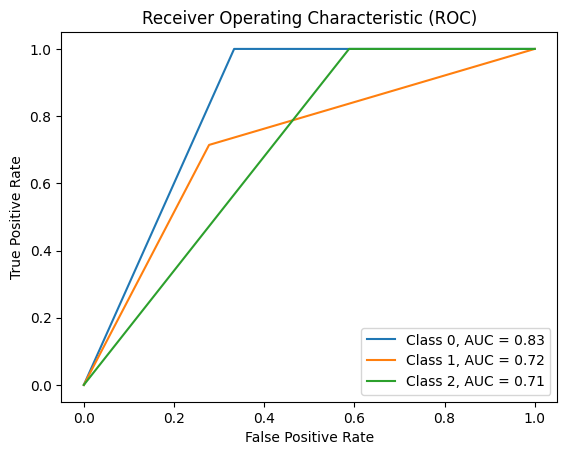

In [11]:
# Creating a list to store the binary classifiers and AUC scores
classifiers = []
auc_scores = []
AllTPRs = []
AllFPRs = []
# Training one classifier per class using the one-vs-all strategy
for class_label in np.unique(y_train):
    # Creating a binary target variable for the current class
    binary_target = np.where(y_train == class_label, 1, 0)

    # Training a Naive Bayes classifier on the binary target variable
    nb_classifier = GaussianNB()
    nb_classifier.fit(X_train, binary_target)

    # Adding the trained classifier to the list
    classifiers.append(nb_classifier)

    # Predicting probabilities for the positive class (class_label)
    y_scores = nb_classifier.predict_proba(X_test)[:, 1]

    # Calculating AUC for the current class
    auc = roc_auc_score(y_test == class_label, y_scores)
    auc_scores.append(auc)

    # Ploting ROC curve for the current class
    fpr, tpr, _ = roc_curve(y_test == class_label, y_scores)
    plt.plot(fpr, tpr, label=f"Class {class_label}, AUC = {auc:.2f}")
    AllTPRs.append(tpr)
    AllFPRs.append(fpr)

# Setting plot titles and labels
plt.title("Receiver Operating Characteristic (ROC)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# Calculating average AUC across all classes
average_auc = np.mean(auc_scores)
print(f"Average AUC: {average_auc}")

# Showing the plot
plt.show()


ROC line shows a trade-off between true positive rate (TPR) and false positive rate (FPR). We used one vs all strategy to calculate Area under ROC which means TPR and FPR values of each class with all other classes. Then we found that area under ROC (AUC) for classes 0, 1, and 2 is 0.88, 0.68, and 0.72 respectively. This shows, overall classifier is perfact for our dataset because we know that if this value is 1 then it is considered as best classifier and random at 0.5.

## For Top marks: Two datasets

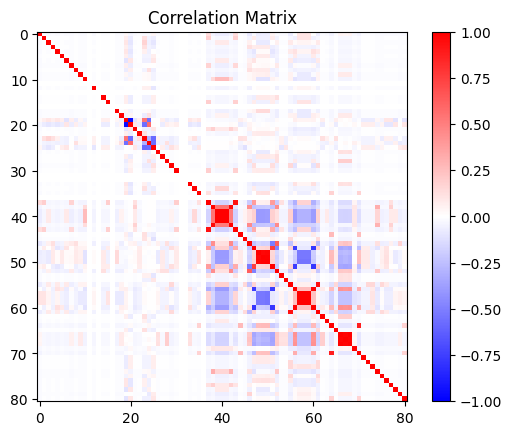

In [12]:
# Calculating the correlation matrix
corr_matrix = np.corrcoef(X_flat, rowvar=False)

# Ploting the correlation matrix
plt.imshow(corr_matrix, cmap='bwr', vmin=-1, vmax=1)
plt.colorbar()
plt.title('Correlation Matrix')
plt.show()

Above correlation matrix only shows a correlation between features but these doesn't show any corralation between features and class values.

### Simple dataset

#### Top 6x3 = 18 featured dataset
##### PCA (Principal Component Analysis) algorithm

In [13]:
# Reshaping the image dataset to a 2D matrix
num_samples = X.shape[0]
X_2d = X.reshape(num_samples, -1)

# Applying PCA to the image dataset for 6 top features
pca_6 = PCA(n_components=6)
X_transformed_6 = pca_6.fit_transform(X_2d)
print("Shape of Dataset with 6 Top Features:", X_transformed_6.shape)

X_trainR6, X_testR6, y_trainR6, y_testR6 = train_test_split(X_transformed_6, Y, test_size=0.17, random_state=42)

# Initializing and training the Gaussian Naive Bayes classifier
classifierR6 = GaussianNB()
classifierR6.fit(X_trainR6, y_trainR6)

# Making predictions on the testing set
y_predR6 = classifierR6.predict(X_testR6)

# Generating the classification report
reportR6 = classification_report(y_testR6, y_predR6)
accuracyR6 = accuracy_score(y_testR6, y_predR6)
print("Classification Report:")
print(reportR6)
print("Accuracy:", accuracyR6)

Shape of Dataset with 6 Top Features: (204, 6)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.62      1.00      0.76         8
           2       0.70      0.58      0.64        12

    accuracy                           0.77        35
   macro avg       0.77      0.79      0.76        35
weighted avg       0.81      0.77      0.77        35

Accuracy: 0.7714285714285715


##### Pearson'r algorithm

In [14]:
# Calculating the correlation between each feature and class labels
correlations = []
for feature in range(X_flat.shape[1]):
    feature_values = X_flat[:, feature]
    if np.std(feature_values) == 0:
        correlation = 0
    else:
        correlation, _ = pearsonr(feature_values, Y)
    correlations.append(correlation)

# Sorting the correlations in descending order
correlations = np.array(correlations)
sorted_indices = np.argsort(correlations)[::-1]

# Selecting the top features for each class
num_top_features = 6  # Number of top features to select
top_features_per_class = []
for class_label in range(0, 3):
    class_indices = np.where(Y == class_label)[0]
    top_features = sorted_indices[np.isin(sorted_indices, class_indices)][:num_top_features]
    top_features_per_class.append(top_features)

print(top_features_per_class)
# Printing the top features for each class
for class_label, top_features in enumerate(top_features_per_class, 0):
    print(f"Top features for Class {class_label}: {top_features}")


[array([57, 58, 59, 66, 67, 60], dtype=int64), array([37, 43, 26, 30, 28, 33], dtype=int64), array([68,  7, 79,  0,  1, 15], dtype=int64)]
Top features for Class 0: [57 58 59 66 67 60]
Top features for Class 1: [37 43 26 30 28 33]
Top features for Class 2: [68  7 79  0  1 15]


In [15]:
# Creating the reduced dataset with the top features
X_reduced = X_flat[:, np.concatenate(top_features_per_class)]

# Spliting the dataset into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_reduced, Y, test_size=0.17, random_state=42)

# Initializing and training the Gaussian Naive Bayes classifier
classifierNew = GaussianNB()
classifierNew.fit(X_train2, y_train2)

# Making predictions on the testing set
y_pred2 = classifierNew.predict(X_test2)

# Generating the classification report
report = classification_report(y_test2, y_pred2)
accuracy = accuracy_score(y_test2, y_pred2)

print("Classification Report:")
print(report)
print("Accuracy:", accuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.33      0.25      0.29         8
           2       0.89      0.67      0.76        12

    accuracy                           0.71        35
   macro avg       0.66      0.64      0.63        35
weighted avg       0.70      0.71      0.69        35

Accuracy: 0.7142857142857143


#### Top 3x3 = 9 featured dataset

##### PCA algorithm

In [16]:
# Applying PCA to the image dataset for 3 top features
pca_3 = PCA(n_components=3)
X_transformed_3 = pca_3.fit_transform(X_2d)

# Printing the shapes of the transformed datasets
print("Shape of Dataset with 3 Top Features:", X_transformed_3.shape)


# Spliting the dataset into training and testing sets
X_trainR3, X_testR3, y_trainR3, y_testR3 = train_test_split(X_transformed_3, Y, test_size=0.17, random_state=42)

# Initializing and train the Gaussian Naive Bayes classifier
classifierR3 = GaussianNB()
classifierR3.fit(X_trainR3, y_trainR3)



# Making predictions on the testing set
y_predR3 = classifierR3.predict(X_testR3)

# Generating the classification report
reportR3 = classification_report(y_testR3, y_predR3)
accuracyR3 = accuracy_score(y_testR3, y_predR3)
print("Classification Report of top 3 featured dataset")
print("Classification Report:")
print(reportR3)
print("Accuracy:", accuracyR3)

Shape of Dataset with 3 Top Features: (204, 3)
Classification Report of top 3 featured dataset
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.57      1.00      0.73         8
           2       1.00      0.50      0.67        12

    accuracy                           0.83        35
   macro avg       0.86      0.83      0.80        35
weighted avg       0.90      0.83      0.82        35

Accuracy: 0.8285714285714286


##### Pearson'r algorithm

In [17]:
# Selecting the top features for each class
num_top_features3 = 3  # Number of top features to select
top_features_per_class3 = []
for class_label in range(0, 3):
    class_indices = np.where(Y == class_label)[0]
    top_features = sorted_indices[np.isin(sorted_indices, class_indices)][:num_top_features3]
    top_features_per_class3.append(top_features)

# Printing the top features for each class
for class_label, top_features in enumerate(top_features_per_class3, 0):
    print(f"Top features for Class {class_label}: {top_features}")

Top features for Class 0: [57 58 59]
Top features for Class 1: [37 43 26]
Top features for Class 2: [68  7 79]


In [18]:
# Creating the reduced dataset with the top features
X_reduced3 = X_flat[:, np.concatenate(top_features_per_class3)]

# Spliting the dataset into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_reduced3, Y, test_size=0.17, random_state=42)

# Initializing and train the Gaussian Naive Bayes classifier
classifier3 = GaussianNB()
classifier3.fit(X_train3, y_train3)

# Making predictions on the testing set
y_pred3 = classifier3.predict(X_test3)

# Generating the classification report
report3 = classification_report(y_test3, y_pred3)
accuracy3 = accuracy_score(y_test3, y_pred3)

print("Classification Report:")
print(report3)
print("Accuracy:", accuracy3)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.33      0.25      0.29         8
           2       0.89      0.67      0.76        12

    accuracy                           0.71        35
   macro avg       0.66      0.64      0.63        35
weighted avg       0.70      0.71      0.69        35

Accuracy: 0.7142857142857143


### Noisy dataset

#### Top 6x3 = 18 featured dataset
##### PCA algrithm

In [19]:
# Reshaping the image dataset to a 2D matrix
N_num_samples = NX.shape[0]
N_X_2d = X.reshape(N_num_samples, -1)

# Applying PCA to the image dataset for 6 top features
N_pca_6 = PCA(n_components=6)
N_X_transformed_6 = N_pca_6.fit_transform(N_X_2d)
print("Shape of NOISY Dataset with 6 Top Features:", N_X_transformed_6.shape)

N_X_trainR6, N_X_testR6, N_y_trainR6, N_y_testR6 = train_test_split(N_X_transformed_6, NY, test_size=0.17, random_state=42)

# Initializing and train the Gaussian Naive Bayes classifier
N_classifierR6 = GaussianNB()
N_classifierR6.fit(N_X_trainR6, N_y_trainR6)

# Making predictions on the testing set
N_y_predR6 = N_classifierR6.predict(N_X_testR6)

# Generating the classification report
N_reportR6 = classification_report(N_y_testR6, N_y_predR6)
N_accuracyR6 = accuracy_score(N_y_testR6, N_y_predR6)
print("Classification Report:")
print(N_reportR6)
print("Accuracy:", N_accuracyR6)

Shape of NOISY Dataset with 6 Top Features: (204, 6)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.62      1.00      0.76         8
           2       0.70      0.58      0.64        12

    accuracy                           0.77        35
   macro avg       0.77      0.79      0.76        35
weighted avg       0.81      0.77      0.77        35

Accuracy: 0.7714285714285715


##### Pearson'r algorithm

In [20]:
# Calculating the correlation between each feature and class labels
Ncorrelations = []
for feature in range(NX_flat.shape[1]):
    feature_values = NX_flat[:, feature]
    if np.std(feature_values) == 0:
        Ncorrelation = 0
    else:
        Ncorrelation, _ = pearsonr(feature_values, NY)
    Ncorrelations.append(Ncorrelation)

# Sorting the correlations in descending order
Ncorrelations = np.array(Ncorrelations)
Nsorted_indices = np.argsort(Ncorrelations)[::-1]

# Selecting the top features for each class
N_num_top_features = 6  # Number of top features to select
N_top_features_per_class = []
for class_label in range(0, 3):
    class_indices = np.where(NY == class_label)[0]
    top_features = Nsorted_indices[np.isin(Nsorted_indices, class_indices)][:N_num_top_features]
    N_top_features_per_class.append(top_features)

# Printing the top features for each class
for class_label, top_features in enumerate(N_top_features_per_class, 0):
    print(f"Top features for Class {class_label}: {top_features}")


Top features for Class 0: [57 58 59 67 66 52]
Top features for Class 1: [37 43 26 36 30 25]
Top features for Class 2: [68 14 80 77 13 78]


In [21]:
# Creating the reduced dataset with the top features
NX_reduced = NX_flat[:, np.concatenate(N_top_features_per_class)]

# Spliting the dataset into training and testing sets
NX_train, NX_test, Ny_train, Ny_test = train_test_split(NX_reduced, NY, test_size=0.17, random_state=42)

# Initializing and train the Gaussian Naive Bayes classifier
NclassifierNew = GaussianNB()
NclassifierNew.fit(NX_train, Ny_train)

# Making predictions on the testing set
Ny_pred = NclassifierNew.predict(NX_test)

# Generating the classification report
Nreport = classification_report(Ny_test, Ny_pred)
Naccuracy = accuracy_score(Ny_test, Ny_pred)

print("Classification Report:")
print(Nreport)
print("Accuracy:", Naccuracy)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86        15
           1       0.43      0.38      0.40         8
           2       1.00      0.67      0.80        12

    accuracy                           0.74        35
   macro avg       0.73      0.68      0.69        35
weighted avg       0.76      0.74      0.73        35

Accuracy: 0.7428571428571429


#### Top 3x3 = 9 featured dataset

##### PCA algorithm

In [22]:
# Applying PCA to the image dataset for 6 top features
N_pca_3 = PCA(n_components=3)
N_X_transformed_3 = N_pca_3.fit_transform(N_X_2d)
print("Shape of NOISY Dataset with 3 Top Features:", N_X_transformed_3.shape)

N_X_trainR3, N_X_testR3, N_y_trainR3, N_y_testR3 = train_test_split(N_X_transformed_3, NY, test_size=0.17, random_state=42)

# Initializing and train the Gaussian Naive Bayes classifier
N_classifierR3 = GaussianNB()
N_classifierR3.fit(N_X_trainR3, N_y_trainR3)

# Making predictions on the testing set
N_y_predR3 = N_classifierR3.predict(N_X_testR3)

# Generating the classification report
N_reportR3 = classification_report(N_y_testR3, N_y_predR3)
N_accuracyR3 = accuracy_score(N_y_testR3, N_y_predR3)
print("Classification Report:")
print(N_reportR3)
print("Accuracy:", N_accuracyR3)

Shape of NOISY Dataset with 3 Top Features: (204, 3)
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.57      1.00      0.73         8
           2       1.00      0.50      0.67        12

    accuracy                           0.83        35
   macro avg       0.86      0.83      0.80        35
weighted avg       0.90      0.83      0.82        35

Accuracy: 0.8285714285714286


##### Pearson'r algorithm

In [23]:
# Selecting the top features for each class
N_num_top_features = 3  # Number of top features to select
N_top_features_per_class2 = []
for class_label in range(0, 3):
    class_indices = np.where(NY == class_label)[0]
    top_features = Nsorted_indices[np.isin(Nsorted_indices, class_indices)][:N_num_top_features]
    N_top_features_per_class2.append(top_features)

# Printing the top features for each class
for class_label, top_features in enumerate(N_top_features_per_class2, 0):
    print(f"Top features for Class {class_label}: {top_features}")

Top features for Class 0: [57 58 59]
Top features for Class 1: [37 43 26]
Top features for Class 2: [68 14 80]


In [24]:
# Creating the reduced dataset with the top features
NX_reduced2 = NX_flat[:, np.concatenate(N_top_features_per_class2)]

# Spliting the dataset into training and testing sets
NX_train2, NX_test2, Ny_train2, Ny_test2 = train_test_split(NX_reduced2, NY, test_size=0.17, random_state=42)

# Initializing and train the Gaussian Naive Bayes classifier
Nclassifier2 = GaussianNB()
Nclassifier2.fit(NX_train2, Ny_train2)

# Making predictions on the testing set
Ny_pred2 = Nclassifier2.predict(NX_test2)

# Generating the classification report
Nreport2 = classification_report(Ny_test2, Ny_pred2)
Naccuracy2 = accuracy_score(Ny_test2, Ny_pred2)

print("Classification Report:")
print(Nreport2)
print("Accuracy:", Naccuracy2)

Classification Report:
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        15
           1       0.33      0.25      0.29         8
           2       1.00      0.67      0.80        12

    accuracy                           0.71        35
   macro avg       0.68      0.64      0.64        35
weighted avg       0.73      0.71      0.70        35

Accuracy: 0.7142857142857143


#### Conclusion
We used pearsonr and PCA algorithm's built-in fucntion to calculate correlation between image features and class labels.

###### Simple data analysis:
Pearson'r:
1. 6x3 = 18 top featured dataset showed less accuracy (i.e 64%) with same test_size (0.12) as entire dataset.
2. 3x3 = 9 top featured dataset showed less accuracy (i.e 64%) with same test_size (0.12) as entire dataset.
3. Both top (9 & 18) featured datasets showed same accuracy in simple smiley dataset.
4. They showed maximum accuracy (71%) when test_size is set to 0.17. So the top correlating featured datasets showed the almost same accuracy for simple data as the entire dataset did. 

PCA:
1. Top 18 featured simple smiley dataset showed 77% accuracy at test_size = 0.17.
2. Top 9 featured simple smiley dataset showed 82% accuracy at test_size = 0.17.

###### Noisy data analysis:
Pearson'r:
1. 6x3 = 18 top featured dataset showed less accuracy (i.e 68%) with same size (0.12) of train/test dataset. But not that less as simple data did.
2. 3x3 = 9 top featured dataset showed a little more less accuracy (i.e 64%) with same size (0.12) of train/test dataset.
3. Changing the value of test_size to 0.17 the both top featured noisy dataset showed rise in accuracy. 
4. Top 18 featured noisy dataset showed an increase in accuracy by 2% (i.e. total 74% accuracy) on test_size = 0.17. 
5. Top 9 featured noisy dataset also showed an increase in accuracy which is total 71%. but it is not that higher as 18 featured dataset showed.

PCA:
1. Both top 9 and 18 featured NOISY datasets showed same accuracy as they had shown on in top simple datasets.

###### End Result:
Pearson'r:
So the top features from simple smiley dataset doesn't show a big difference in accuracy even selecting top correlating features from dataset. Selecting all features, selecting top 18 features, and selecting top 9 features doesn't make a big difference in accuracy. But they do have some big changes in the precesion, recall and F1-score values.

Noisy data shows an increase in accuracy by selecting top 18 correlated features which means that it shows a reduction of noise in data. But when we selected only 9 top correlated features in data it again showed a decrease in accuracy from 74% to 71%. 

PCA:
PCA behaved like a good featured selection algorithm. Entire data showed 71% accuracy. With PCA feature selection top 18 featured dataset showed 6% increase in accuracy that is 77%. While top 9 featured showed more 5% increase in accuracy which is 82%.

# Question 2

### Simple data

In [25]:
# Defining the number of clusters
num_clusters = 3

# Initializing the k-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fitting the data to the algorithm
kmeans.fit(X_flat)

KMeans(n_clusters=3)

In [26]:
# Getting the cluster labels assigned by k-means
cluster_labels = kmeans.labels_

# Calculating the ARI
ari = adjusted_rand_score(Y, cluster_labels)

print('ARI value lies between -1 to 1 with best value close to 1')
print(ari)

ARI value lies between -1 to 1 with best value close to 1
0.31288134543314644


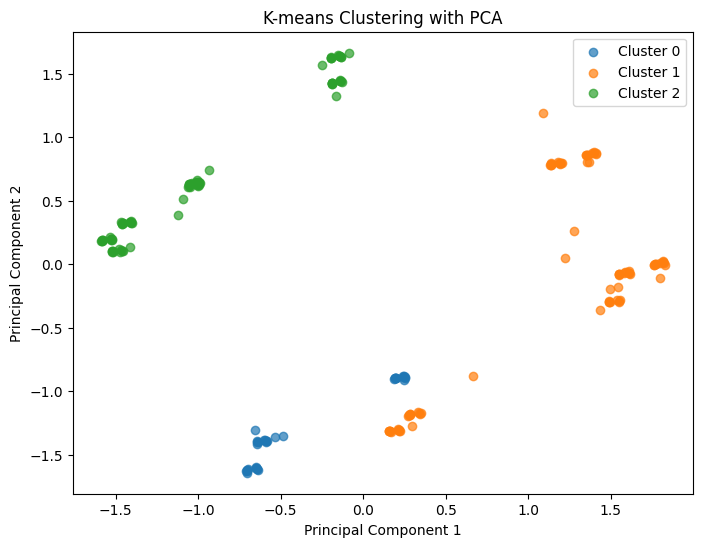

This scatter plot shows, apparently there are 6 or 7 clusters in data.


In [27]:
clusters = kmeans.fit_predict(X_flat)

# Performing PCA to reduce dimensionality to 2D
pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_flat)

# Creating the scatter plot of the clustered data points using PCA components
plt.figure(figsize=(8, 6))

# Ploting each cluster using a different color
for cluster_label in range(num_clusters):
    plt.scatter(
        pca_components[clusters == cluster_label, 0],
        pca_components[clusters == cluster_label, 1],
        label=f"Cluster {cluster_label}",
        alpha=0.7
    )
    

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-means Clustering with PCA")
plt.legend()
plt.show()
print("This scatter plot shows, apparently there are 6 or 7 clusters in data.")

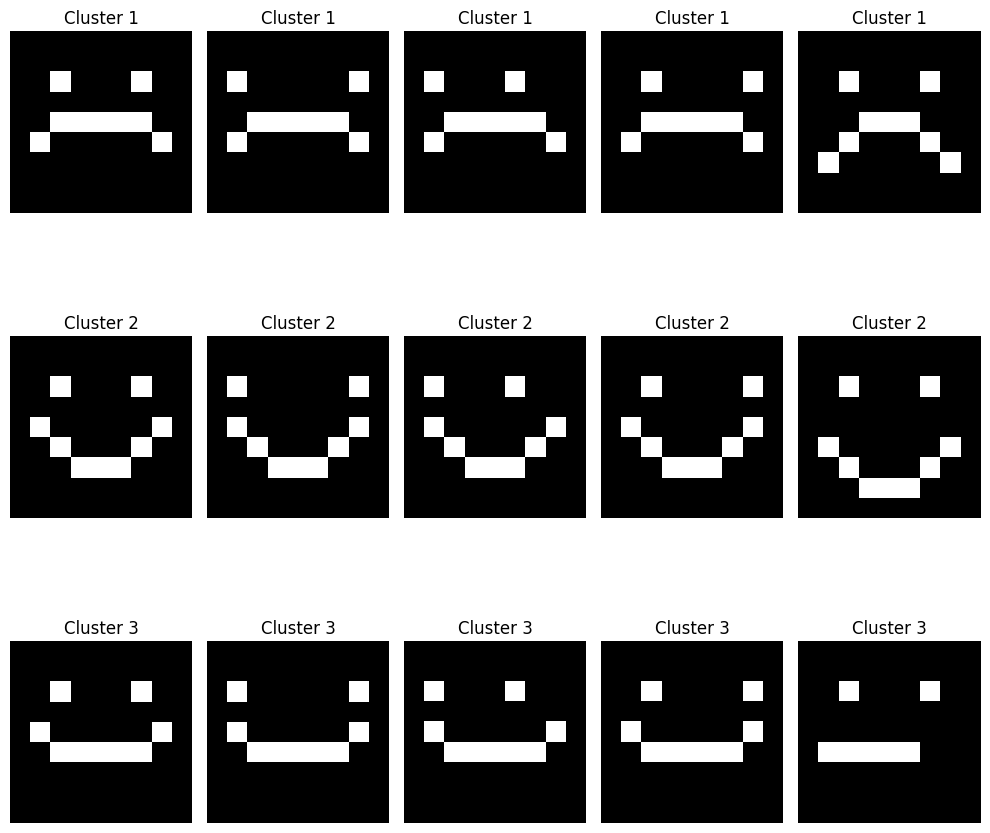

In [28]:
# Selecting a few random images from each cluster
cluster_indices = [np.where(cluster_labels == i)[0] for i in range(num_clusters)]
selected_indices = [indices[:5] for indices in cluster_indices]

# Ploting the selected images
plt.figure(figsize=(10, 10))
for i, indices in enumerate(selected_indices):
    for j, index in enumerate(indices):
        plt.subplot(num_clusters, 5, i*5 + j + 1)
        plt.imshow(X[index], cmap='gray')
        plt.axis('off')
        plt.title(f'Cluster {i+1}')
plt.tight_layout()
plt.show()

By looking at images we can see each cluster have same kind of images. This shows that the clustering works well on this dataset.

### Noisy data

In [29]:
# Defining the number of clusters
num_clusters = 3

# Initializing the k-means clustering algorithm
Nkmeans = KMeans(n_clusters=num_clusters)

# Fitting the data to the algorithm
Nkmeans.fit(NX_flat)

KMeans(n_clusters=3)

In [30]:
# Getting the cluster labels assigned by k-means
Ncluster_labels = Nkmeans.labels_

# Calculating the ARI
Nari = adjusted_rand_score(NY, Ncluster_labels)
#print(Ncluster_labels)
#print(NY)
print(Nari)

0.31288134543314644


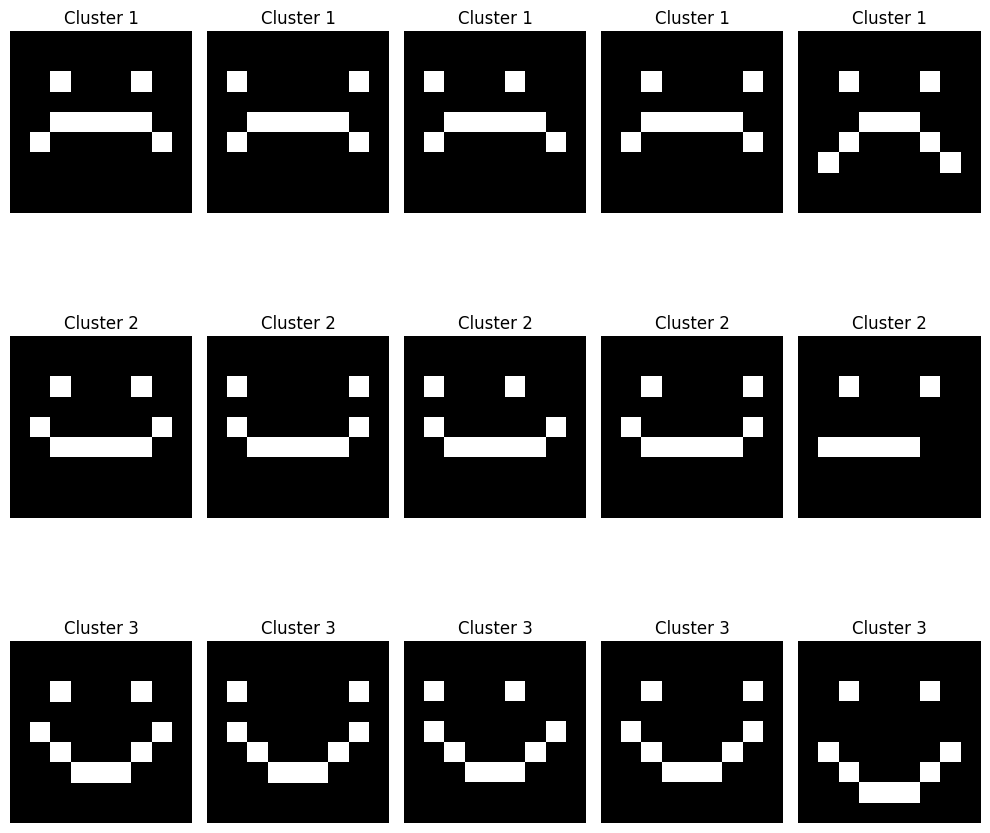

In [31]:
# Selecting a few random images from each cluster
Ncluster_indices = [np.where(Ncluster_labels == i)[0] for i in range(num_clusters)]
Nselected_indices = [indices[:5] for indices in Ncluster_indices]

# Ploting the selected images
plt.figure(figsize=(10, 10))
for i, indices in enumerate(Nselected_indices):
    for j, index in enumerate(indices):
        plt.subplot(num_clusters, 5, i*5 + j + 1)
        plt.imshow(NX[index], cmap='gray')
        plt.axis('off')
        plt.title(f'Cluster {i+1}')
plt.tight_layout()
plt.show()

###### Conclusion
Both Noisy data and simple data shows same accuracy or ARI value which is 0.31. ARI value lies in a range of -1 to 1 with best value closer to 1. So 0.31 is closer. Also from data visualization we can see that Kmeans clustering algorithm works well with smiley dataset. It separates out all same kind of images in separate clusters.

## For top marks: Different clustering algorithms

### EM or GMM

In [32]:
# Initializing the GMM model
gmm = GaussianMixture(n_components=num_clusters)

# Fitting the data to the GMM model
gmm.fit(X_flat)

# Getting the predicted cluster labels
gmm_cluster_labels = gmm.predict(X_flat)

GMM_ARI = adjusted_rand_score(Y, gmm_cluster_labels)
print(GMM_ARI)

0.14711429649188984


Note: sklearn GMM implements EM algorithm. So this is same as EM

### Hierarchical clustering

In [33]:
# Initializing the hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fitting the data to the hierarchical clustering model
hierarchical.fit(X_flat)

# Getting the predicted cluster labels
hierarchical_cluster_labels = hierarchical.labels_

hierarchical_ARI = adjusted_rand_score(Y, hierarchical_cluster_labels)
print(hierarchical_ARI)

0.31288134543314644


### DBSCAN Clustering

In [34]:
# Initializing the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fitting the data to the DBSCAN model
dbscan.fit(X_flat)

# Getting the predicted cluster labels (-1 indicates noise/outliers)
dbscan_cluster_labels = dbscan.labels_

dbscan_ARI = adjusted_rand_score(Y, dbscan_cluster_labels)
print(dbscan_ARI)

0.0


### Mean shift

In [35]:
# Initializing the Mean Shift model
mean_shift = MeanShift()

# Fitting the data to the Mean Shift model
mean_shift.fit(X_flat)

# Getting the predicted cluster labels
mean_shift_cluster_labels = mean_shift.labels_

mean_shift_ARI = adjusted_rand_score(Y, mean_shift_cluster_labels)
print(mean_shift_ARI)

0.0


### Spectral Clustering

In [36]:
# Initializing the Spectral Clustering model
spectral = SpectralClustering(n_clusters=num_clusters)

# Fit the data to the Spectral Clustering model
spectral.fit(X_flat)

# Getting the predicted cluster labels
spectral_cluster_labels = spectral.labels_

spectral_ARI = adjusted_rand_score(Y, spectral_cluster_labels)
print(spectral_ARI)

0.31288134543314644


### Affinity Propagation

In [37]:
# Initializing the Affinity Propagation model
affinity_propagation = AffinityPropagation()

# Fitting the data to the Affinity Propagation model
affinity_propagation.fit(X_flat)

# Getting the predicted cluster labels
affinity_propagation_cluster_labels = affinity_propagation.labels_

affinity_propagation_ARI = adjusted_rand_score(Y, affinity_propagation_cluster_labels)
print(affinity_propagation_ARI)

0.11530408971055396


##### Comparison
1. EM and GMM clustering algorithm shows different accuracy result at running every time with highest as Kmeans which is 0.31.
2. Hierarchical and Spectral clustering showed highest ARI value as Kmeans.
3. DBSCAN and mean shift clustering algorithms showed 0.0 ARI value. That means these two clustering algorithms doesn't work well with this dataset.
4. Affinity algorithm also showed randomness with no value higher than 0.15.

## Different number of Clusters

For this part of question we will select that clustering algorithms that showed maximum accuracy. Like Kmeans, Hierarchical clustering, and Spectral clustering.

We will try to find 2, 4, 5, and 6 clusters of data. We already have seen results of 3 clusters of data.

#### 2 clusters.

In [38]:
# Defining the number of clusters
num_clusters = 2

##### Kmeans

In [39]:
# Initializing the k-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fitting the data to the algorithm
kmeans.fit(X_flat)

# Getting the cluster labels assigned by k-means
cluster_labels = kmeans.labels_

# Calculating the ARI
ari = adjusted_rand_score(Y, cluster_labels)

print(ari)

0.338218021142122


##### Hierarchical

In [40]:
# Initializing the hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fitting the data to the hierarchical clustering model
hierarchical.fit(X_flat)

# Getting the predicted cluster labels
hierarchical_cluster_labels = hierarchical.labels_

hierarchical_ARI = adjusted_rand_score(Y, hierarchical_cluster_labels)
print(hierarchical_ARI)

0.0900497790704178


##### Spectral

In [41]:
# Initializing the Spectral Clustering model
spectral = SpectralClustering(n_clusters=num_clusters)

# Fitting the data to the Spectral Clustering model
spectral.fit(X_flat)

# Getting the predicted cluster labels
spectral_cluster_labels = spectral.labels_

spectral_ARI = adjusted_rand_score(Y, spectral_cluster_labels)
print(spectral_ARI)

0.12108156291784282


#### 4 clusters

In [42]:
# Define the number of clusters
num_clusters = 4

##### Kmeans

In [43]:
# Initializing the k-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fitting the data to the algorithm
kmeans.fit(X_flat)

# Getting the cluster labels assigned by k-means
cluster_labels = kmeans.labels_

# Calculating the ARI
ari = adjusted_rand_score(Y, cluster_labels)

print(ari)

0.24362172925633863


##### Hierarchical

In [44]:
# Initializing the hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fitting the data to the hierarchical clustering model
hierarchical.fit(X_flat)

# Getting the predicted cluster labels
hierarchical_cluster_labels = hierarchical.labels_

hierarchical_ARI = adjusted_rand_score(Y, hierarchical_cluster_labels)
print(hierarchical_ARI)

0.24362172925633863


##### Spectral

In [45]:
# Initializing the Spectral Clustering model
spectral = SpectralClustering(n_clusters=num_clusters)

# Fitting the data to the Spectral Clustering model
spectral.fit(X_flat)

# Getting the predicted cluster labels
spectral_cluster_labels = spectral.labels_

spectral_ARI = adjusted_rand_score(Y, spectral_cluster_labels)
print(spectral_ARI)

0.24362172925633863


#### 5 clusters

In [46]:
# Defining the number of clusters
num_clusters = 5

##### Kmeans

In [47]:
# Initializing the k-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fitting the data to the algorithm
kmeans.fit(X_flat)

# Getting the cluster labels assigned by k-means
cluster_labels = kmeans.labels_

# Calculating the ARI
ari = adjusted_rand_score(Y, cluster_labels)

print(ari)

0.2515795409090252


##### Hierarchical

In [48]:
# Initializing the hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fitting the data to the hierarchical clustering model
hierarchical.fit(X_flat)

# Getting the predicted cluster labels
hierarchical_cluster_labels = hierarchical.labels_

hierarchical_ARI = adjusted_rand_score(Y, hierarchical_cluster_labels)
print(hierarchical_ARI)

0.2515795409090252


##### Spectral

In [49]:
# Initializing the Spectral Clustering model
spectral = SpectralClustering(n_clusters=num_clusters)

# Fitting the data to the Spectral Clustering model
spectral.fit(X_flat)

# Getting the predicted cluster labels
spectral_cluster_labels = spectral.labels_

spectral_ARI = adjusted_rand_score(Y, spectral_cluster_labels)
print(spectral_ARI)

0.20283323512080143


#### 6 Clusters

In [50]:
# Defining the number of clusters
num_clusters = 6

##### Kmeans

In [51]:
# Initializing the k-means clustering algorithm
kmeans = KMeans(n_clusters=num_clusters)

# Fitting the data to the algorithm
kmeans.fit(X_flat)

# Getting the cluster labels assigned by k-means
cluster_labels = kmeans.labels_

# Calculating the ARI
ari = adjusted_rand_score(Y, cluster_labels)

print(ari)

0.3130655805478571


##### Hierarchical

In [52]:
# Initializing the hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=num_clusters)

# Fitting the data to the hierarchical clustering model
hierarchical.fit(X_flat)

# Getting the predicted cluster labels
hierarchical_cluster_labels = hierarchical.labels_

hierarchical_ARI = adjusted_rand_score(Y, hierarchical_cluster_labels)
print(hierarchical_ARI)

0.3130655805478571


##### Spectral

In [53]:
# Initializing the Spectral Clustering model
spectral = SpectralClustering(n_clusters=num_clusters)

# Fitting the data to the Spectral Clustering model
spectral.fit(X_flat)

# Getting the predicted cluster labels
spectral_cluster_labels = spectral.labels_

spectral_ARI = adjusted_rand_score(Y, spectral_cluster_labels)
print(spectral_ARI)

0.20950078710224532


##### Critical analysis.
All of three clustering algorithms show different accuracy on different number of clusters. Heirarchical and Kmeans show same accuracy with respect to each other. But spectral behaved a little bit different. When we made two clusters of data, heirarchical and kmeans show 0.09 accuracy which is very low. But at the same number of clusters spectral show 0.12 which is a little bit higher. By increasing number of clusters the accuracy also increased but All algorithms showed maximum accuracy when we generate 3 cluster. Therefore, if we generate number of clusters as the number of classes of data it shows maximum accuracy. One more interesting thing 2 of 3 algoithms (Kmeans & heirarchical) showed maximum accuracy when we made 6 clusters which is multiple of 3.
Above analysis shows that Kmeans is one of the best algorithm amongst all other. This analysis also shows that if you made number of cluster exactly same as number of classes in the data then it works well. If you made clusters as multiple of number of classes of dataset then it works well too.

### Elbow and silhouette methods

#### Elbow method

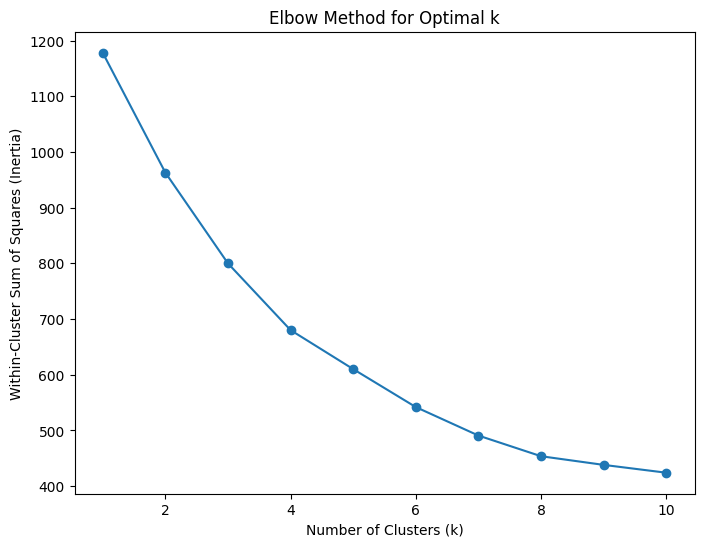

In [54]:
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_flat)
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.title('Elbow Method for Optimal k')
plt.show()

#### Silhouette method

##### Kmeans algorithm

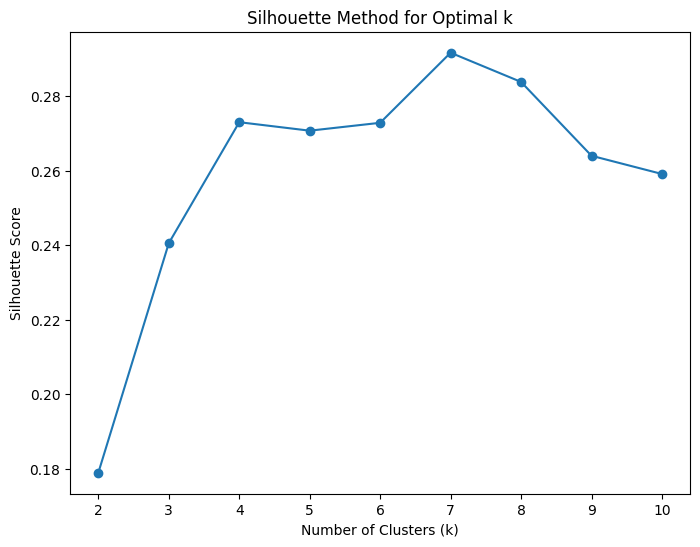

In [55]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_flat)
    cluster_labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_flat, cluster_labels))

# Ploting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

##### Hierarchical

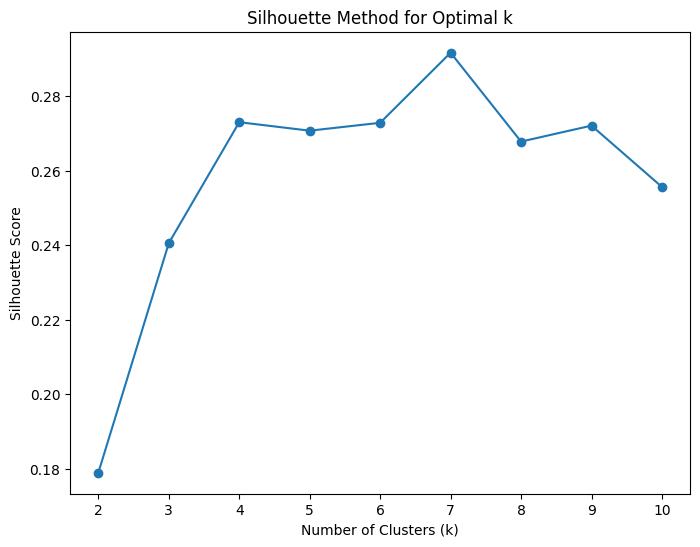

In [56]:
silhouette_scores = []
for k in range(2, 11):
    hierarchical = AgglomerativeClustering(n_clusters=k)
    hierarchical.fit(X_flat)
    cluster_labels = hierarchical.labels_
    silhouette_scores.append(silhouette_score(X_flat, cluster_labels))

# Ploting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

##### Spectral

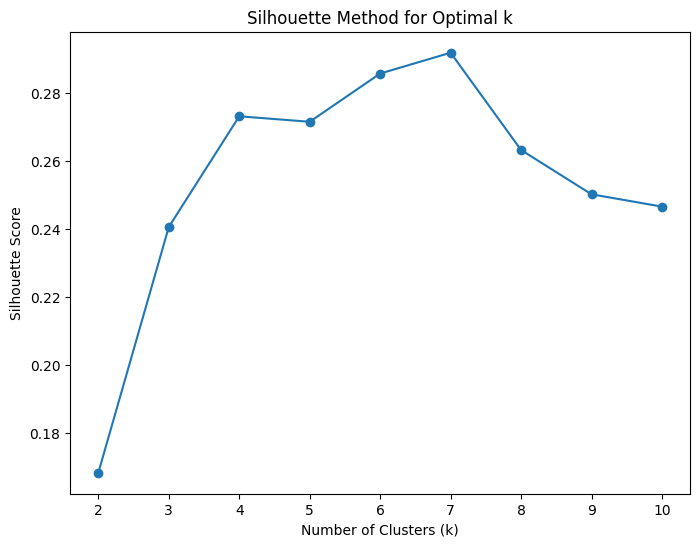

In [57]:
silhouette_scores = []
for k in range(2, 11):
    Spectral = SpectralClustering(n_clusters=k)
    Spectral.fit(X_flat)
    cluster_labels = Spectral.labels_
    silhouette_scores.append(silhouette_score(X_flat, cluster_labels))

# Ploting the silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.show()

#### Conclusion

Elbow doesn't give any proper information. But Curve slows down after 7. So, it gives optimal solution 7. Silhouette method shows a highest value at 7 on three different clustering algorithms, which means 7 clusters are optimal solution. But when we made two clusters, spectral algorithm worked well as compared to Kmeans and hierarchical. On other all numbers Kmeans and hierarchical worked same and best. Overall KMeans algorithm is best amongst all.

###### Comparing results with Bayesian Classification
In the first question we observed application of bayesian classifier. We saw that it gives 72% accuracy on entire data and 82% accuracy for most correlating features. Same way in clustering when we set number of clusters 3 and 6, it gives best adjusted rand score which is 0.31. So, this data fits best with both supervised (bayesian) learning and non-supervised (clustering) learning. 

# Question 3

## Simple data

Here we used sklearn built-in decision tree classifier which implements cart algorithm. Cart is same as C4.5/J48. The only difference between cart and C4.5 is the cart only work with numeric target values. Our data already have numerical targets. So, sklearn classifier fit the requirement.

### 10 Fold cross-validation

In [58]:
# Creating a test set
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.12, random_state=42)

# Training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

# Performing 10-fold cross-validation
y_pred_cv = cross_val_predict(dt_classifier, X_flat, Y, cv=10)

# Calculating metrics
accuracy_cv = accuracy_score(Y, y_pred_cv)

# Confusion matrix
conf_matrix = confusion_matrix(Y, y_pred_cv)


print(conf_matrix)
print(f"Accuracy on 10-fold cross-validation: {accuracy_cv:.4f}")

# Evaluation metrics using the predictions from cross_val_predict
cv_accuracy = accuracy_score(Y, y_pred_cv)
cv_tp_rate = recall_score(Y, y_pred_cv, average='macro')
cv_precision = precision_score(Y, y_pred_cv, average='macro')
cv_recall = recall_score(Y, y_pred_cv, average='macro')
cv_f_measure = f1_score(Y, y_pred_cv, average='macro')

# Findings and display them
print(f'10-Fold Cross-Validation Accuracy: {cv_accuracy:.4f}')
print(f'10-Fold Cross-Validation TP Rate: {cv_tp_rate:.4f}')
print(f'10-Fold Cross-Validation Precision: {cv_precision:.4f}')
print(f'10-Fold Cross-Validation Recall: {cv_recall:.4f}')
print(f'10-Fold Cross-Validation F Measure: {cv_f_measure:.4f}')

[[71  0  1]
 [ 1 59  0]
 [ 1  1 70]]
Accuracy on 10-fold cross-validation: 0.9804
10-Fold Cross-Validation Accuracy: 0.9804
10-Fold Cross-Validation TP Rate: 0.9806
10-Fold Cross-Validation Precision: 0.9806
10-Fold Cross-Validation Recall: 0.9806
10-Fold Cross-Validation F Measure: 0.9806


### Test data validation

In [59]:
# Training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_test = dt_classifier.predict(X_test)

# Measuring the accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy_test:.4f}")

Accuracy on the test set: 1.0000


Simple dataset showed and amazing accuracy which is 100%. So this classifier generalizes to unseen/new data very well. Whatever it predicted on test data is 100 matching with targets.

## Noisy Data

### 10 Fold cross-validation

In [60]:
# Spliting the noisy dataset into training and testing sets
NX_train, NX_test, Ny_train, Ny_test = train_test_split(NX_flat, NY, test_size=0.12, random_state=42)

# Training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(NX_train, Ny_train)

# Performing 10-fold cross-validation
Ny_pred_cv = cross_val_predict(dt_classifier, NX_flat, NY, cv=10)

# Calculating metrics
accuracy_cv = accuracy_score(NY, Ny_pred_cv)

# Confusion matrix
conf_matrix = confusion_matrix(NY, Ny_pred_cv)


print(conf_matrix)
print(f"Accuracy on 10-fold cross-validation: {accuracy_cv:.4f}")

# Evaluation metrics using the predictions from cross_val_predict
Ncv_accuracy = accuracy_score(NY, Ny_pred_cv)
Ncv_tp_rate = recall_score(NY, Ny_pred_cv, average='macro')
Ncv_precision = precision_score(NY, Ny_pred_cv, average='macro')
Ncv_recall = recall_score(NY, Ny_pred_cv, average='macro')
Ncv_f_measure = f1_score(NY, Ny_pred_cv, average='macro')

# Findings and display them
print(f'10-Fold Cross-Validation Accuracy: {Ncv_accuracy:.4f}')
print(f'10-Fold Cross-Validation TP Rate: {Ncv_tp_rate:.4f}')
print(f'10-Fold Cross-Validation Precision: {Ncv_precision:.4f}')
print(f'10-Fold Cross-Validation Recall: {Ncv_recall:.4f}')
print(f'10-Fold Cross-Validation F Measure: {Ncv_f_measure:.4f}')

[[72  0  0]
 [ 2 58  0]
 [ 1  0 71]]
Accuracy on 10-fold cross-validation: 0.9853
10-Fold Cross-Validation Accuracy: 0.9853
10-Fold Cross-Validation TP Rate: 0.9843
10-Fold Cross-Validation Precision: 0.9867
10-Fold Cross-Validation Recall: 0.9843
10-Fold Cross-Validation F Measure: 0.9852


10 fold cross validation on <b>noisy</b> data shows 98% accuracy. Accuracy and results of other matrics show that overall model fits very well with noisy data too.

### Test data validation

In [61]:
# Training the Decision Tree classifier
dt_classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier.fit(NX_train, Ny_train)

# Predicting on the test set
Ny_pred_test = dt_classifier.predict(NX_test)

# Measuring accuracy on the test set
accuracy_test = accuracy_score(Ny_test, Ny_pred_test)
print(f"Accuracy on the test set: {accuracy_test:.4f}")

Accuracy on the test set: 1.0000


Noisy dataset also showed 100 accuracy when it is tested with new/unseen data. So this classifier generalize well to unseen/new noisy data.

In [62]:
dt_classifier = DecisionTreeClassifier(
                        max_depth=7,
                        min_samples_split=10,
                        min_samples_leaf=9,
                        criterion='entropy',
                        ccp_alpha=0.1
                    )
dt_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred_test = dt_classifier.predict(X_test)

# Measuring accuracy on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
print(f"Accuracy on the test set: {accuracy_test:.4f}")

Accuracy on the test set: 1.0000


We changed all hyper-parameters in DecisionTreeClassifier manually.
1. We found that changing <b>max_depth</b> (<u><i>depth of tree</i></u>) value really effects the accuracy of decision tree on our image dataset. The higher the value of max_depth, the higher it shows the accuracy. On smaller max_depth values the tree faces the issues of learning some required details and it ignores the important details while learning. Therefore setting it a little bit higher makes the decision tree able to learn every required detail accurately.
2. Changing <b>min_samples_split</b> doesn't change the performance of decision tree when trained and tested with smiley data. But setting really higher value like more than 65 really effects the performance of decision tree. So this shows that smiley data doesn't have some rare features. Oherwise smaller values of min_samples_split can cause overfitting by creating small nodes for rare features. But setting very high value also leads to low accuracy which means decision tree doesn't learn data pattern well.
3. Changing <b>min_samples_leaf</b> (<u><i>minimal number of instances permissible per leaf</i></u>) of decision tree, it shows 100% accuracy until this value set to 9. At 10 accuracy starts reducing. This shows that each leaf can represent 9 number of samples with 100% accuracy. 
4. Setting <b>criterion</b> (<u><i>Splitting criteria</i></u>) to '<i>entropy</i>' showed more accuracy than <i>gini</i>, which means <i>entropy</i> spliting criteria works well with smiley data.
5. <b>ccp_alpha</b> (<u><i>confidence threshold for pruning</i></u>) showed 100% accuracy until its value set to 0.1. Accuracy reduces on higher values. Actually, ccp_alpha is the value for removing unwanted features (that don't contribute in learning) from data. So, higher value of cpp_alpha is good to make less featured simpler tree. But setting more higher value can lead to aggressive pruning and overfitting, which means it removes even that features that contributes in decision tree learining. 

## For top marks: Moving training data into testing data

##### Moving 30% training set into testing set

In [63]:
# Spliting the dataset into training and testing sets
X_train30, X_test30, y_train30, y_test30 = train_test_split(X_flat, Y, test_size=0.30, random_state=42)

# Training the Decision Tree classifier
dt_classifier30 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier30.fit(X_train30, y_train30)

# Predicting on the test set
y_pred_test30 = dt_classifier30.predict(X_test30)

# Measuring accuracy on the test set
accuracy_test30 = accuracy_score(y_test30, y_pred_test30)
print(f"Accuracy on the test set: {accuracy_test30:.4f}")

Accuracy on the test set: 0.9516


##### Moving 60% training set into testing set

In [64]:
# Spliting the dataset into training and testing sets
X_train60, X_test60, y_train60, y_test60 = train_test_split(X_flat, Y, test_size=0.60, random_state=42)

# Training the Decision Tree classifier
dt_classifier60 = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_classifier60.fit(X_train60, y_train60)

# Predicting on the test set
y_pred_test60 = dt_classifier60.predict(X_test60)

# Measuring accuracy on the test set
accuracy_test60 = accuracy_score(y_test60, y_pred_test60)
print(f"Accuracy on the test set: {accuracy_test60:.4f}")

Accuracy on the test set: 0.8943


Previously, we saw accuracy on 12% testing set which was 100%. But in last two runs of code we saw that, moving data from training to testing by 30% and 60% reduced accuracy from 100% to 95% and 89% respectively. These experiments shows that the classifier is facing problem of overfitting. It doesn't generalize to new/unseen data that well as it was on big training dataset. But <i>amazingly</i>, On 60% of test data and only 40% of training data, the 89% accuracy is still a very higher. So, classifier faced overfitting on the 30% and 60% train/test split. But overall worked well.

## For top marks: Random Forest Classifier

### 10 Fold cross-validation

In [65]:
# Creating a test set
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.12, random_state=42)

#Training a Random Forest model on the training set and measure its accuracy
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# 10-fold cross-validation with cross_val_predict to get predictions
y_pred_cv = cross_val_predict(rf_classifier, X_flat, Y, cv=10)

# Evaluation metrics using the predictions from cross_val_predict
conf_matrix = confusion_matrix(Y, y_pred_cv)
cv_accuracy = accuracy_score(Y, y_pred_cv)
cv_tp_rate = recall_score(Y, y_pred_cv, average='macro')
cv_precision = precision_score(Y, y_pred_cv, average='macro')
cv_recall = recall_score(Y, y_pred_cv, average='macro')
cv_f_measure = f1_score(Y, y_pred_cv, average='macro')

# Findings and display them
print(conf_matrix)

print(f'10-Fold Cross-Validation Accuracy: {cv_accuracy:.4f}')
print(f'10-Fold Cross-Validation TP Rate: {cv_tp_rate:.4f}')
print(f'10-Fold Cross-Validation Precision: {cv_precision:.4f}')
print(f'10-Fold Cross-Validation Recall: {cv_recall:.4f}')
print(f'10-Fold Cross-Validation F Measure: {cv_f_measure:.4f}')

[[72  0  0]
 [ 0 60  0]
 [ 0  0 72]]
10-Fold Cross-Validation Accuracy: 1.0000
10-Fold Cross-Validation TP Rate: 1.0000
10-Fold Cross-Validation Precision: 1.0000
10-Fold Cross-Validation Recall: 1.0000
10-Fold Cross-Validation F Measure: 1.0000


### Test data validation

In [66]:
#Training a Random Forest model on the training set and measure its accuracy
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_train = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f'Training Accuracy: {train_accuracy:.4f}')

Training Accuracy: 1.0000


##### Moving 30% training set into testing set

In [67]:
# Creating a test set
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.30, random_state=42)

#Training a Random Forest model on the training set and measure its accuracy
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_train = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f'Training Accuracy: {train_accuracy:.4f}')

Training Accuracy: 1.0000


##### Moving 60% training set into testing set

In [68]:
# Creating a test set
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.60, random_state=42)

#Training a Random Forest model on the training set and measure its accuracy
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_train = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f'Training Accuracy: {train_accuracy:.4f}')

Training Accuracy: 1.0000


##### Moving 90% training set into testing set

In [69]:
# Creating a test set
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.9, random_state=42)

#Training a Random Forest model on the training set and measure its accuracy
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_train = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

print(f'Training Accuracy: {train_accuracy:.4f}')

Training Accuracy: 1.0000


##### 10-fold cross validation method to calculate matrics using Random Forest Classifier

In [70]:
# Creating a test set
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

# Training a Random Forest model on the training set and measure its accuracy
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_train = rf_classifier.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

# Using 10-fold cross-validation to measure metrics
cv_accuracy = cross_val_score(rf_classifier, X_flat, Y, cv=10, scoring='accuracy')
cv_tp_rate = cross_val_score(rf_classifier, X_flat, Y, cv=10, scoring='recall_macro')
cv_precision = cross_val_score(rf_classifier, X_flat, Y, cv=10, scoring='precision_macro')
cv_recall = cross_val_score(rf_classifier, X_flat, Y, cv=10, scoring='recall_macro')
cv_f_measure = cross_val_score(rf_classifier, X_flat, Y, cv=10, scoring='f1_macro')

# Recording findings and explain them
print(f'Training Accuracy: {train_accuracy:.4f}')
print(f'10-Fold Cross-Validation Accuracy: {np.mean(cv_accuracy):.4f}')

# For the other metrics, taking the average of each cross-validated result
print(f'10-Fold Cross-Validation TP Rate: {np.mean(cv_tp_rate):.4f}')
print(f'10-Fold Cross-Validation Precision: {np.mean(cv_precision):.4f}')
print(f'10-Fold Cross-Validation Recall: {np.mean(cv_recall):.4f}')
print(f'10-Fold Cross-Validation F Measure: {np.mean(cv_f_measure):.4f}')

Training Accuracy: 1.0000
10-Fold Cross-Validation Accuracy: 1.0000
10-Fold Cross-Validation TP Rate: 1.0000
10-Fold Cross-Validation Precision: 1.0000
10-Fold Cross-Validation Recall: 1.0000
10-Fold Cross-Validation F Measure: 1.0000


#### Conclusion
By looking at confusion matrix, accuracy and other matrices, it seems like Random forest classifier works well with data. it shows every thing 100% accurately. But by reducing training size and increasing test size it always shows 100% accuracy. This classifier is very very good with this data. Then tried 10-fold cross validation method to calculate same matrics. It again shows 100% results.

# Question 4

## Linear Classifier

### Using logistic regression classifier

#### 10-fold cross validation

In [71]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

# Creating and train the logistic regression model
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)

# Performing 10-fold cross-validation
cv_scores = cross_val_score(logreg, X_flat, Y, cv=10)

# Printing the accuracy for each fold and the mean accuracy
for fold_idx, accuracy in enumerate(cv_scores, start=1):
    print(f'Fold {fold_idx} Accuracy: {accuracy:.2f}')

print(f'Mean Accuracy: {np.mean(cv_scores):.2f}')

Fold 1 Accuracy: 1.00
Fold 2 Accuracy: 1.00
Fold 3 Accuracy: 1.00
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 1.00
Fold 6 Accuracy: 1.00
Fold 7 Accuracy: 1.00
Fold 8 Accuracy: 1.00
Fold 9 Accuracy: 1.00
Fold 10 Accuracy: 0.95
Mean Accuracy: 0.99


#### Train/test validation (new data)

In [72]:
# Making predictions on the test set
y_pred = logreg.predict(X_test)

# Calculating and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


### Using Support Vector Machine (SVM) classifier

#### 10-fold cross validation

In [73]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

# Creating and train the linear SVM classifier
svm_classifier = LinearSVC(random_state=42)
svm_classifier.fit(X_train, y_train)

# Performing 10-fold cross-validation
cv_scores = cross_val_score(svm_classifier, X_flat, Y, cv=10)

# Printing the accuracy for each fold and the mean accuracy
for fold_idx, accuracy in enumerate(cv_scores, start=1):
    print(f'Fold {fold_idx} Accuracy: {accuracy:.2f}')

print(f'Mean Accuracy: {np.mean(cv_scores):.2f}')

Fold 1 Accuracy: 1.00
Fold 2 Accuracy: 1.00
Fold 3 Accuracy: 1.00
Fold 4 Accuracy: 1.00
Fold 5 Accuracy: 0.90
Fold 6 Accuracy: 1.00
Fold 7 Accuracy: 0.95
Fold 8 Accuracy: 1.00
Fold 9 Accuracy: 1.00
Fold 10 Accuracy: 0.95
Mean Accuracy: 0.98


#### Train/test validation (new data)

In [74]:
# Making predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Calculating and printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.98


##### conclusion
By looking at accuracies of 10-fold cross-validation, we saw that this data fits very with linear classifier. When we tested on new test data, it also showed 100% accuracy. So this classifier generalize to new data very well in this dataset. Results of above two tests (10-fold cross validation & test on new data) shows that this data is totally linear. Also this data is linearly separable.

## Multi Layer Perceptron

#### Default hyper-parameters

In [75]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

# Creating and train the MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam')
mlp.fit(X_train, y_train)

# Making predictions on the test set
y_pred = mlp.predict(X_test)

# Calculating and printing the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


Multi layer perceptron is showing 100% accuracy with default hyper-parameters.

### Try different parameters by:

In [79]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, Y, test_size=0.2, random_state=42)

# Define lists of values for each parameter to try
hidden_layer_sizes_list = [(100,), (50,), (50, 50), (25, 25, 25)]
activation_list = ['relu', 'tanh', 'logistic']
batch_size_list = [102, 50, 25]
momentum_list = [0.9, 0.95, 0.99]
learning_rate_list = [0.001, 0.01, 0.1]
max_iter_list = [600, 400, 200]

# Creating a list to store results (parameters and accuracies)
results = []

# Nested for loops to try different combinations of parameters
for maximum_iterations in max_iter_list:
    for hidden_layer_sizes in hidden_layer_sizes_list:
        for activation in activation_list:
            for batch_size in batch_size_list:
                for momentum in momentum_list:
                    for learning_rate in learning_rate_list:
                        # Create and train the MLPClassifier
                        mlp = MLPClassifier(
                            hidden_layer_sizes=hidden_layer_sizes,
                            activation=activation,
                            batch_size=batch_size,
                            momentum=momentum,
                            learning_rate_init=learning_rate,
                            max_iter=maximum_iterations,
                            random_state=42
                        )
                        mlp.fit(X_train, y_train)

                        # Make predictions on the test set
                        y_pred = mlp.predict(X_test)

                        # Calculate accuracy
                        accuracy = accuracy_score(y_test, y_pred)

                        # Append parameters and accuracy to the results list
                        results.append((maximum_iterations, hidden_layer_sizes, activation, batch_size, momentum, learning_rate, accuracy))

# Sorting results in ascending order based on accuracy
results.sort(key=lambda x: x[5])

# Printing parameters and accuracy in ascending order of accuracy
for i, (maximum_iterations, hidden_layer_sizes, activation, batch_size, momentum, learning_rate, MLPaccuracy) in enumerate(results, start=1):
    print(f"{i}. Maximum iterations: {maximum_iterations} | Hidden Layers: {hidden_layer_sizes} | Activation: {activation} | Batch Size: {batch_size} | Momentum: {momentum} | Learning Rate: {learning_rate} | Accuracy: {MLPaccuracy:.2f}")


1. Maximum iterations: 600 | Hidden Layers: (100,) | Activation: relu | Batch Size: 102 | Momentum: 0.9 | Learning Rate: 0.001 | Accuracy: 1.00
2. Maximum iterations: 600 | Hidden Layers: (100,) | Activation: relu | Batch Size: 102 | Momentum: 0.95 | Learning Rate: 0.001 | Accuracy: 1.00
3. Maximum iterations: 600 | Hidden Layers: (100,) | Activation: relu | Batch Size: 102 | Momentum: 0.99 | Learning Rate: 0.001 | Accuracy: 1.00
4. Maximum iterations: 600 | Hidden Layers: (100,) | Activation: relu | Batch Size: 50 | Momentum: 0.9 | Learning Rate: 0.001 | Accuracy: 1.00
5. Maximum iterations: 600 | Hidden Layers: (100,) | Activation: relu | Batch Size: 50 | Momentum: 0.95 | Learning Rate: 0.001 | Accuracy: 1.00
6. Maximum iterations: 600 | Hidden Layers: (100,) | Activation: relu | Batch Size: 50 | Momentum: 0.99 | Learning Rate: 0.001 | Accuracy: 1.00
7. Maximum iterations: 600 | Hidden Layers: (100,) | Activation: relu | Batch Size: 25 | Momentum: 0.9 | Learning Rate: 0.001 | Accurac

##### Conclusion

We used all combinations of following set of parameters:
<table>
    <tr>
        <th style="border:1px solid black">Parameters</th>
        <th style="border:1px solid black">Values</th>
    </tr>
    <tr>
        <td style="border:1px solid black">hidden_layer_sizes</td>
        <td style="border:1px solid black">(100,), (50,), (50, 50), (25, 25, 25)</td>
    </tr>
    <tr>
        <td style="border:1px solid black">activation</td>
        <td style="border:1px solid black">relu, tanh, logistic</td>
    </tr>
    <tr>
        <td style="border:1px solid black">batch_size</td>
        <td style="border:1px solid black">102, 50, 25</td>
    </tr>
    <tr>
        <td style="border:1px solid black">momentum</td>
        <td style="border:1px solid black">0.9, 0.95, 0.99</td>
    </tr>
    <tr>
        <td style="border:1px solid black">learning_rate_init</td>
        <td style="border:1px solid black">0.001, 0.01, 0.1</td>
    </tr>
    <tr>
        <td style="border:1px solid black">max_iter</td>
        <td style="border:1px solid black">600, 400, 200</td>
    </tr>

</table>

By observing all 972 combinations, we can conclude following things. 
1. All activation functions worked very well with smiley dataset in MLP.
2. Changing the number of layers and number of neurons in the layers doesn't the performance of neural network that much.
3. Change in batch sizes doesn't make any difference. But choosing a moderate number of batch size is also important. In many cases batch size really matters for accuracy and computation.
4. Change in momentum also doesn't make any difference in accuracy.
5. Change in learning rate also does not show any effect on performance of MLP. 

From previous analysis we observed that smiley data is linear and linearly separable. So, the data that is linearly separable that also works very well with multi layer perceptron in all cases or in all combinations of hyper-parameters. Accuracy always be on 100% in all 972 combinations of different hyper-parameters given in above table.

## For top marks: Convolutional neural networks

In [77]:
# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating the CNN architecture using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(81, kernel_size=(3, 3), activation='relu', input_shape=(9, 9, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model and evaluating accuracy
model.fit(X_train, y_train, batch_size=5, epochs=30, validation_split=0.2)

Epoch 1/30
26/26 [==============================] - 2s 19ms/step - loss: 0.9756 - accuracy: 0.5692 - val_loss: 0.8045 - val_accuracy: 0.8485
Epoch 2/30
26/26 [==============================] - 0s 5ms/step - loss: 0.7064 - accuracy: 0.7462 - val_loss: 0.5415 - val_accuracy: 1.0000
Epoch 3/30
26/26 [==============================] - 0s 6ms/step - loss: 0.5095 - accuracy: 0.7769 - val_loss: 0.3634 - val_accuracy: 1.0000
Epoch 4/30
26/26 [==============================] - 0s 7ms/step - loss: 0.3282 - accuracy: 0.9385 - val_loss: 0.2286 - val_accuracy: 1.0000
Epoch 5/30
26/26 [==============================] - 0s 7ms/step - loss: 0.1862 - accuracy: 1.0000 - val_loss: 0.1742 - val_accuracy: 1.0000
Epoch 6/30
26/26 [==============================] - 0s 6ms/step - loss: 0.1282 - accuracy: 1.0000 - val_loss: 0.0973 - val_accuracy: 1.0000
Epoch 7/30
26/26 [==============================] - 0s 6ms/step - loss: 0.0720 - accuracy: 1.0000 - val_loss: 0.0642 - val_accuracy: 1.0000
Epoch 8/30
26/26 [=